# EcoFOCIpy ADCP QC - 17CB-1A

- mostly remove >100 cm/s flows in u/v
- trim failed instrument time

In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xdf = xa.load_dataset('17cb1a_0174m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 17441, depth: 24)
Coordinates:
  * time             (time) datetime64[ns] 2017-04-23T04:00:00 ... 2019-04-19...
  * depth            (depth) float64 -26.0 -18.0 -10.0 ... 142.0 150.0 158.0
  * latitude         (latitude) float64 57.72
  * longitude        (longitude) float64 -152.3
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 -8.453 ... nan
    v_curr_comp      (latitude, longitude, time, depth) float64 -6.723 ... nan
    w_curr_comp      (latitude, longitude, time, depth) float64 2.6 6.0 ... nan
    w_curr_comp_err  (latitude, longitude, time, depth) float64 3.4 nan ... nan
    agc1             (latitude, longitude, time, depth) float64 78.0 ... nan
    agc2             (latitude, longitude, time, depth) float64 85.0 ... nan
    agc3             (latitude, longitude, time, depth) float64 83.0 ... nan
    agc4             (latitude, longitude, time, depth) float64 82.0 ... nan
Attributes: (12/13)
    Latitude_DegMMddW:                      57 43.310 N
    Longitude_DegMMddN:                     152 17.430 W
    MooringID:                              17CB-1A
    platform_deployment_date:               2017-04-23T03:26:00Z
    platform_deployment_cruise_name:        DY1704
    platform_recovery_date:                 2019-04-19T20:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  1/2m chain section adde below 30"...
    WaterDepth:                             193.0
    date_created:                           2022-11-23T14:54:16Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [4]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

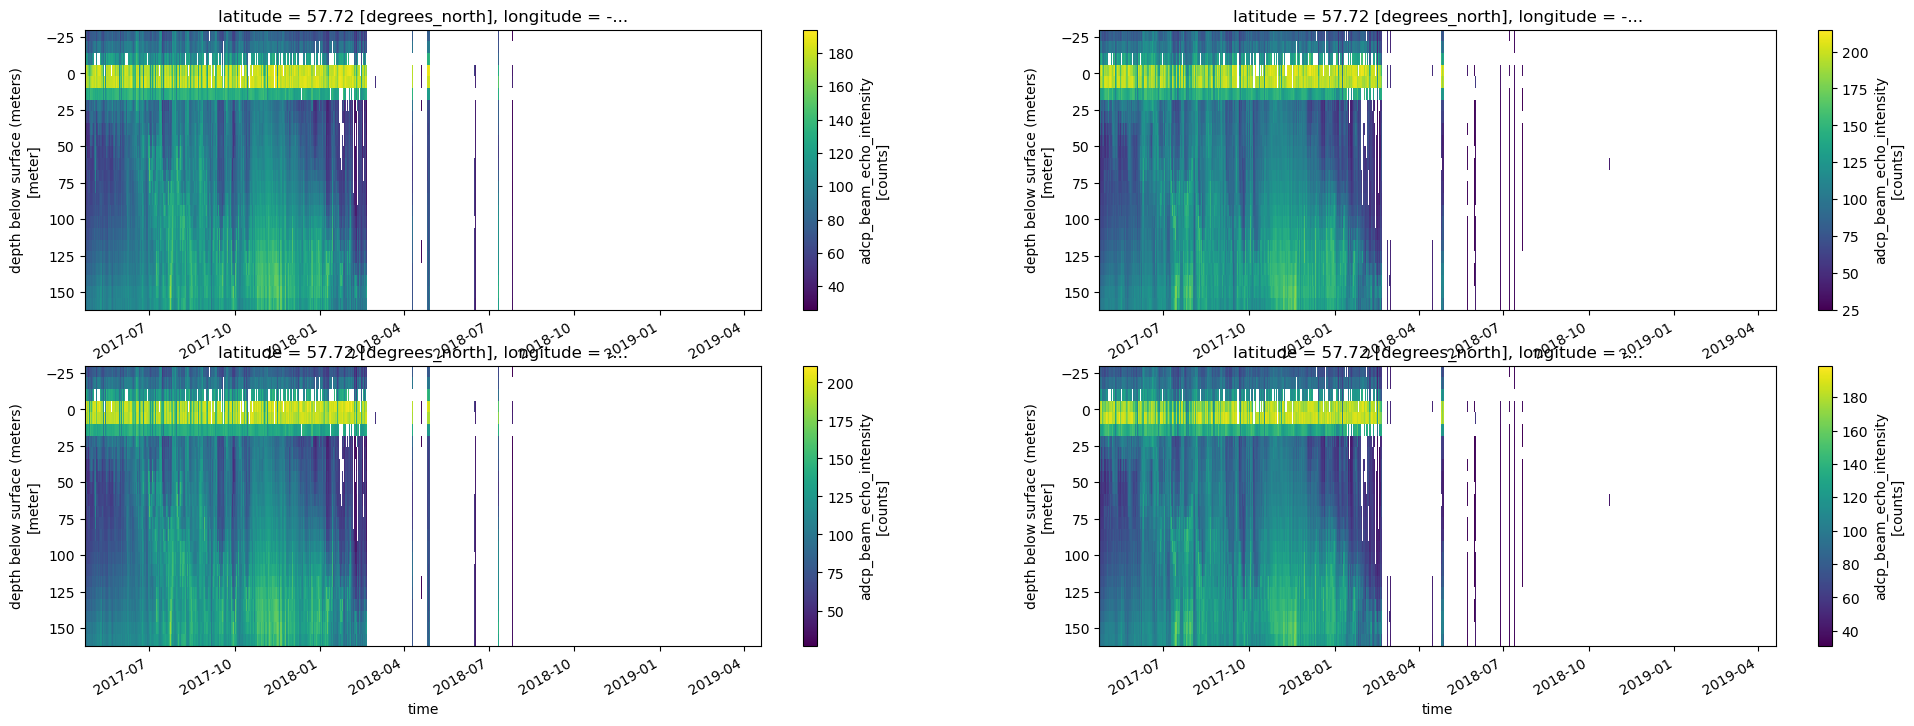

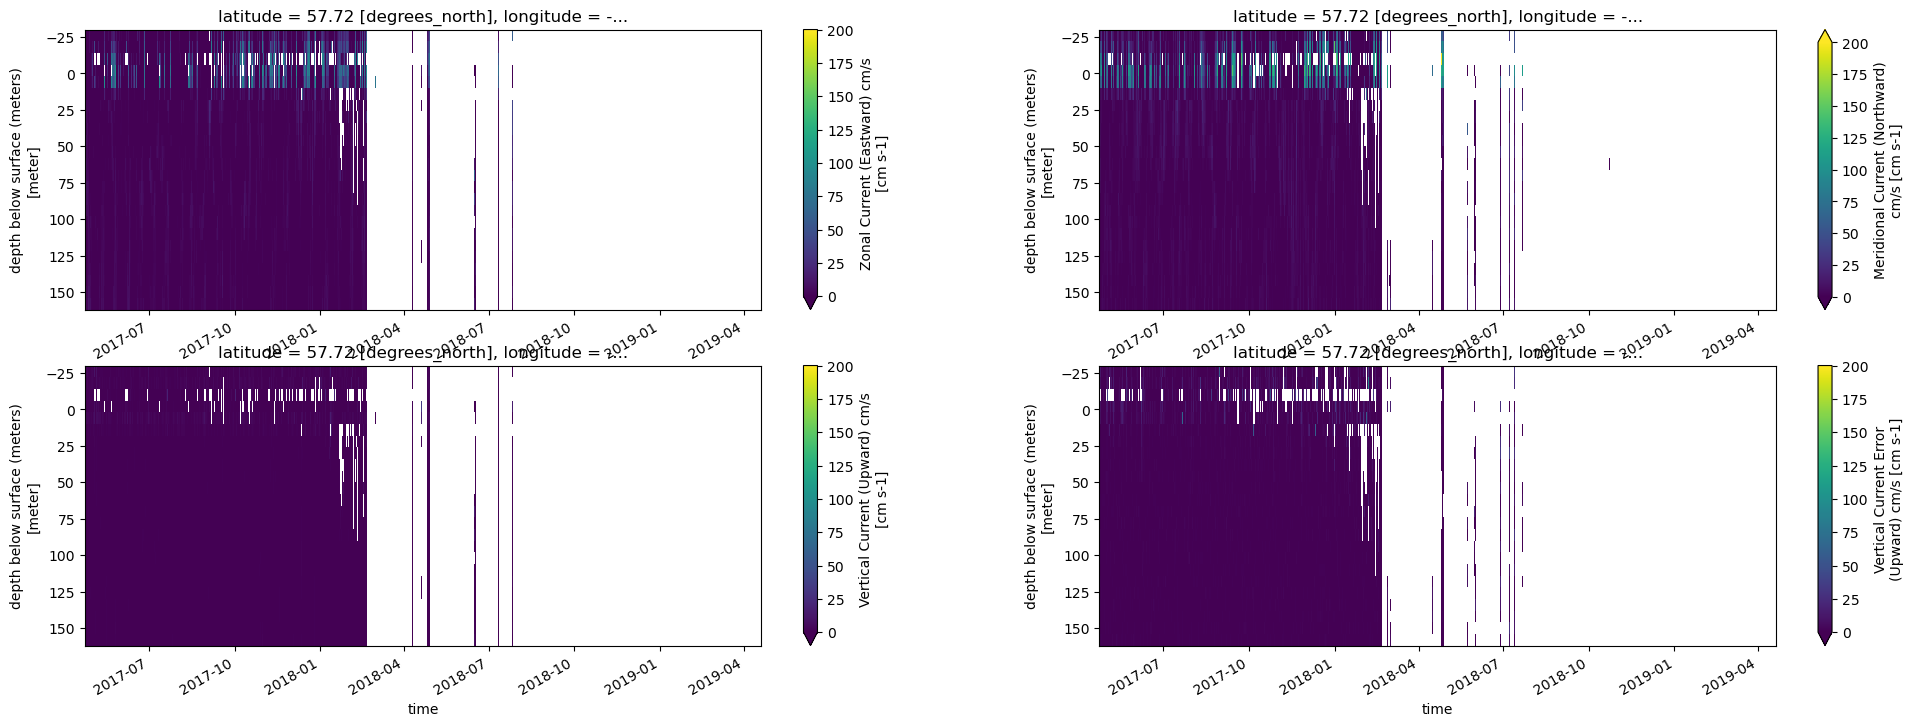

In [5]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [6]:
xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'

## Trim above surface (negative values)

In [7]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [8]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [10]:
ixdf.to_netcdf('17cb1a_0174m.trimmed.nc')

In [11]:
xdf = xa.load_dataset('17cb1a_0174m.trimmed.nc')

In [12]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [13]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

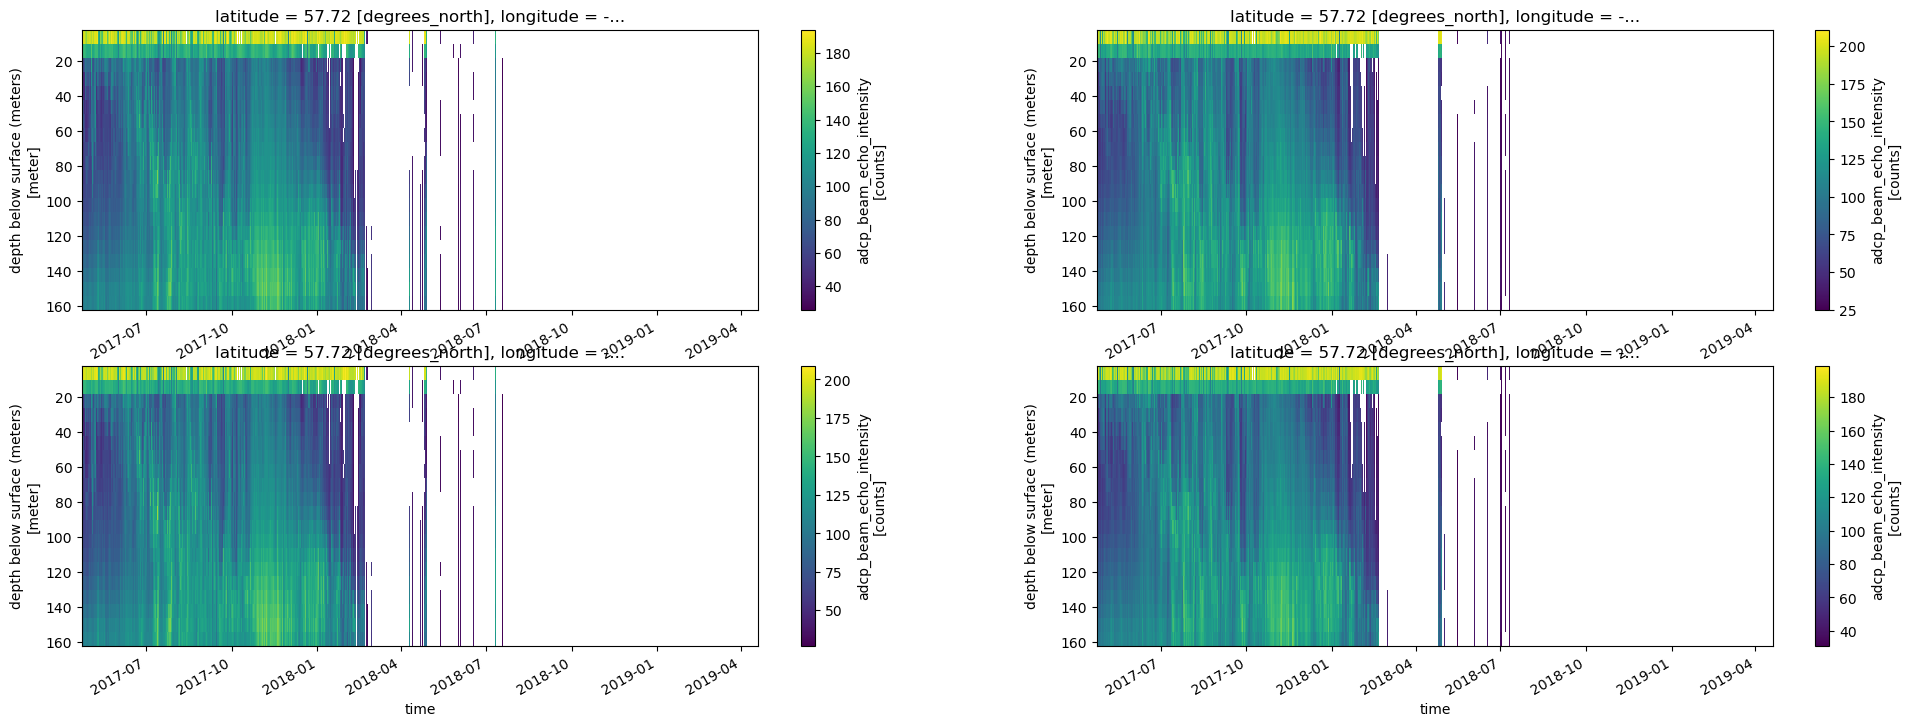

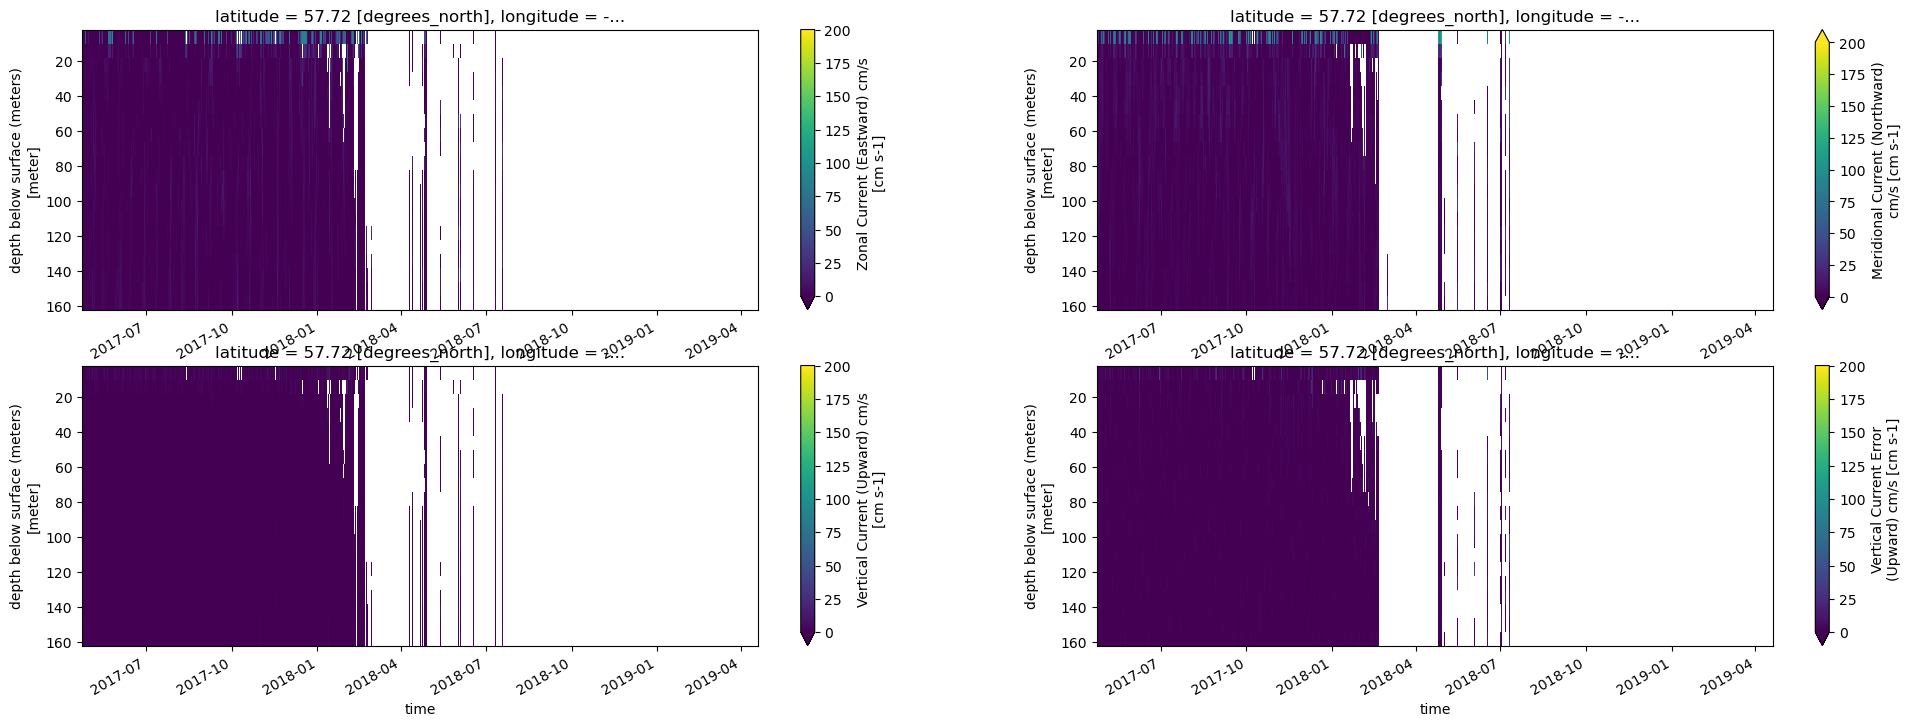

In [14]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [15]:
ixdf.to_netcdf('17cb1a_0174m.filtered.nc')

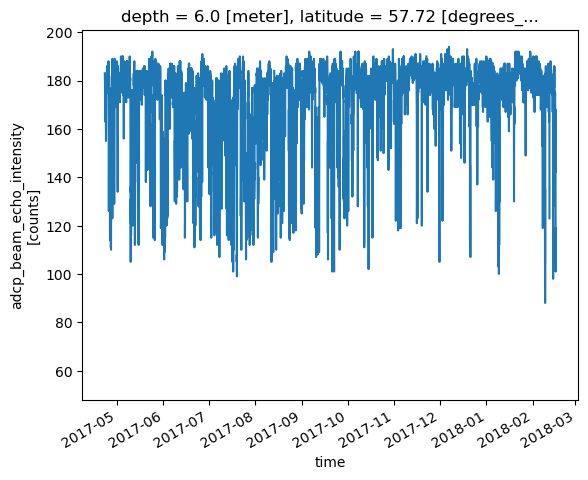

In [34]:
## Trim to end of bulk of good data
# ~= 2018-02-15

ixdf['agc1'].isel({'depth':0}).sel(time=slice('2017-01-01','2018-02-15')).plot()

In [32]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed to good data'
ixdf.sel(time=slice('2017-01-01','2018-02-15')).to_netcdf('17cb1a_0174m.filtered.trimmed.nc')